<a href="https://colab.research.google.com/github/skerd2498/Sales-prediction/blob/main/Project1_part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

filename= '/content/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


How many rows and columns?

In [6]:
df.shape

(8523, 12)

In [7]:
What are the datatypes of each variable?

Object `variable` not found.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Are there duplicates? If so, drop any duplicates.

In [8]:
df.duplicated().sum()

0

Identify missing values

In [9]:
pd.isnull(df).sum().sum()

3873

In [10]:
null = pd.isnull(df)
null

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
missing = df['Item_Weight'].isnull()
df.loc[missing, 'Item_Weight']

7      NaN
18     NaN
21     NaN
23     NaN
29     NaN
        ..
8485   NaN
8487   NaN
8488   NaN
8490   NaN
8504   NaN
Name: Item_Weight, Length: 1463, dtype: float64

In [12]:
missing2= df['Outlet_Size'].isnull()
df.loc[missing2, 'Outlet_Size']

3       NaN
8       NaN
9       NaN
25      NaN
28      NaN
       ... 
8502    NaN
8508    NaN
8509    NaN
8514    NaN
8519    NaN
Name: Outlet_Size, Length: 2410, dtype: object

In [13]:
df1=df.loc[: , 'Outlet_Size'].dropna(how = 'NaN') #dropping all the NaN values
df1

0       Medium
1       Medium
2       Medium
4         High
5       Medium
         ...  
8517     Small
8518      High
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 6113, dtype: object

In [14]:
pd.isnull(df1).sum().sum() #clarifying if there is any null 

0

In [15]:

df.loc[~missing, 'Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 7060, dtype: float64

In [16]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean()) #all the null values will be replaced by mean of the Item Weight column

In [17]:
pd.isnull(df['Item_Weight']).sum().sum() #clarifying if there is any null

0

In [18]:
df['Item_Fat_Content'].unique() #checking the values of the column

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [19]:
df["Item_Fat_Content"].replace({"low fat": "Low Fat", "LF": "Low Fat" , "reg": "Regular"}, inplace=True) #fixing inconsistent data
df["Item_Fat_Content"].head()

0    Low Fat
1    Regular
2    Low Fat
3    Regular
4    Low Fat
Name: Item_Fat_Content, dtype: object

In [20]:
df['Item_Fat_Content'].unique() #checking the values after fixing

array(['Low Fat', 'Regular'], dtype=object)

For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [21]:
df[['Item_Visibility', 'Item_Weight', 'Item_MRP' , 'Outlet_Establishment_Year','Item_Outlet_Sales']].describe()

,Item_Visibility,Item_Weight,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,12.857645,140.992782,1997.831867,2181.288914
std,0.051598,4.226124,62.275067,8.371760,1706.499616
min,0.000000,4.555000,31.290000,1985.000000,33.290000
25%,0.026989,9.310000,93.826500,1987.000000,834.247400
50%,0.053931,12.857645,143.012800,1999.000000,1794.331000
75%,0.094585,16.000000,185.643700,2004.000000,3101.296400
max,0.328391,21.350000,266.888400,2009.000000,13086.964800


Histogram to view the distributions of various features in your dataset.

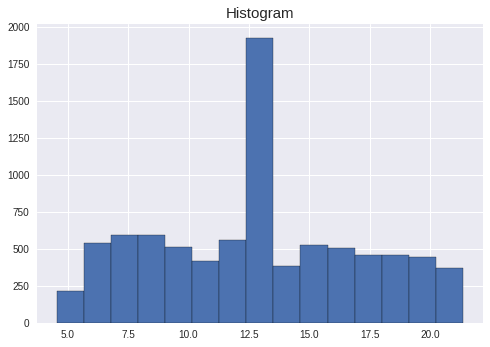

In [32]:
plt.style.use('seaborn')
df['Item_Weight'].hist(bins=15, edgecolor='black');
plt.title('Histogram' , fontsize=15);

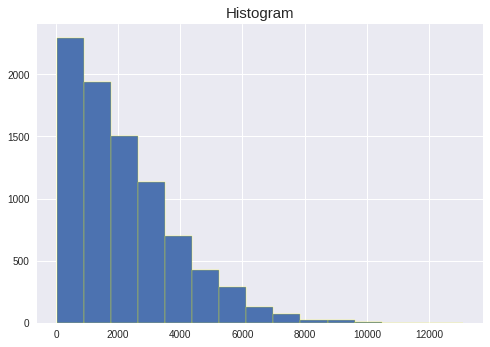

In [33]:
plt.style.use('seaborn')
df['Item_Outlet_Sales'].hist(bins=15, edgecolor='yellow');
plt.title('Histogram' , fontsize=15);

Boxplot to view statistical summaries of various features in your dataset.

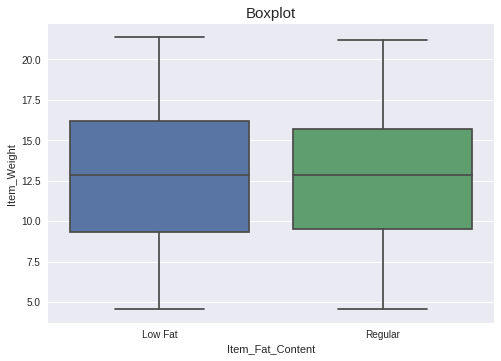

In [30]:
sns.boxplot(x='Item_Fat_Content', y='Item_Weight', data=df);
plt.title('Boxplot' , fontsize=15);

Heatmap of the correlation between features.

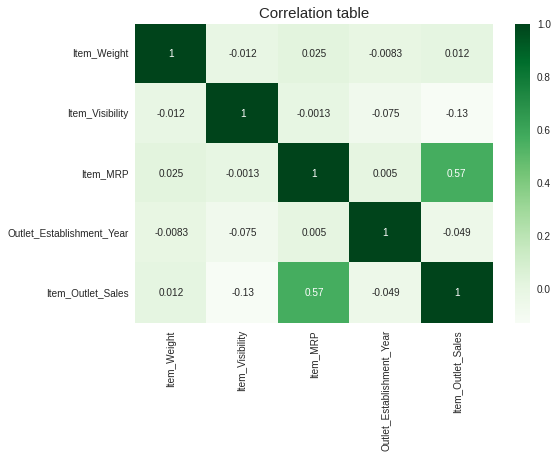

In [29]:
corr= df.corr()
sns.heatmap(corr, cmap='Greens' , annot= True);
plt.title('Correlation table', fontsize=15);

In [36]:
outlet= df.groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].sum()
outlet

Outlet_Identifier
OUT010    1.883402e+05
OUT013    2.142664e+06
OUT017    2.167465e+06
OUT018    1.851823e+06
OUT019    1.796941e+05
OUT027    3.453926e+06
OUT035    2.268123e+06
OUT045    2.036725e+06
OUT046    2.118395e+06
OUT049    2.183970e+06
Name: Item_Outlet_Sales, dtype: float64

In [44]:
unique_outlet = list(outlet.index)
unique_outlet

['OUT010',
 'OUT013',
 'OUT017',
 'OUT018',
 'OUT019',
 'OUT027',
 'OUT035',
 'OUT045',
 'OUT046',
 'OUT049']

In [45]:
sales_outlet = list(outlet.values)
sales_outlet

[188340.17240000013,
 2142663.5781999985,
 2167465.2939999998,
 1851822.8300000012,
 179694.09360000002,
 3453926.0514,
 2268122.935400002,
 2036725.4769999988,
 2118395.168199999,
 2183969.8101999997]

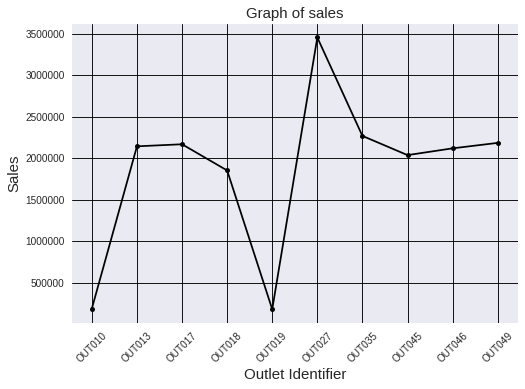

In [80]:

plt.style.use('seaborn')
plt.plot(unique_outlet, sales_outlet,marker = '.', markersize = 10,c = '#000000');
plt.xticks(rotation = 45);
plt.xlabel('Outlet Identifier', fontsize=15);
plt.ylabel('Sales',fontsize=15);
plt.title('Graph of sales',fontsize=15);
plt.grid(c = 'k', 
         alpha = .9,
         linestyle = '-')
plt.ticklabel_format(useOffset=False, style='plain',axis='y')
